In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

In [85]:
processed_data = pd.read_parquet("/mnt/c/Users/Florian/Desktop/Uni/MSc/FoPr/preprocessed_pcp_data.parquet")
processed_data.head()

,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution
0,AAAAAAAAAAAAAAAAGLGLGP,"[2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...","[12746190.0, 2009914.0, 12746190.0, 791369.9, ...",2,84118390.0,2,4.312718e+07,"[0, 1, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]","[0.0014942136737631886, 0.977159622342211, 0.0..."
1,AAAAAAAAAAAAAAAASAGGK,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[5944787.0, 5944787.0, 8502878.0, 6425294.0, 8...",2,8824163.0,2,7.635637e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
2,AAAAAAAAAAAAAAAGAGAGAK,"[2, 2, 2, 2]","[3067981.0, 3067981.0, 3067981.0, 3067981.0]",2,3067981.0,2,3.067981e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
3,AAAAAAAAAAAAAAASGFAYPGTSER,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[11913300.0, 11913300.0, 11913300.0, 11913300....",2,11913300.0,2,8.273927e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.9879325512697509, 0.012067448730249095..."
4,AAAAAAAAAAAAAAG,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1573785.0, 4638296.0, 7934979.0, 2019978.0, 4...",1,16573010.0,1,8.562738e+06,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [86]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757820 entries, 0 to 758525
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   modified_sequence                  757820 non-null  object 
 1   precursor_charge                   757820 non-null  object 
 2   precursor_intensity                757820 non-null  object 
 3   charge_by_max_intensity            757820 non-null  int64  
 4   max_intensity                      757820 non-null  float64
 5   charge_by_avg_intensity            757820 non-null  int64  
 6   avg_intensity                      757820 non-null  float64
 7   one_hot_most_abundant_charge       757820 non-null  object 
 8   charge_state_vector                757820 non-null  object 
 9   normalized_intensity_distribution  757820 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 63.6+ MB


In [87]:
len(processed_data)

757820

## -----------------
# Data split Task 1
## -----------------

In [88]:
df = processed_data.copy()
# split stratified on charge_by_max_intensity
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['charge_by_max_intensity'])
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df['charge_by_max_intensity'])

In [89]:
def calculate_relative_distribution(dataframe):
    distribution = dataframe['charge_by_max_intensity'].value_counts(normalize=True)
    return distribution * 100

# Check distribution of the stratified column
# print("Train Set Absolute Distribution:")
# print(train_df['charge_by_max_intensity'].value_counts())
print("\nTrain Set Relative Distribution:")
print(calculate_relative_distribution(train_df))

# print("\nValidation Set Absolute Distribution:")
# print(val_df['charge_by_max_intensity'].value_counts())
print("\nValidation Set Relative Distribution:")
print(calculate_relative_distribution(val_df))

# print("\nTest Set Absolute Distribution:")
# print(test_df['charge_by_max_intensity'].value_counts())
print("\nTest Set Relative Distribution:")
print(calculate_relative_distribution(test_df))


Train Set Relative Distribution:
charge_by_max_intensity
2    52.579548
3    34.693155
4     7.359047
1     4.505028
5     0.800322
6     0.062900
Name: proportion, dtype: float64

Validation Set Relative Distribution:
charge_by_max_intensity
2    52.579108
3    34.692935
4     7.359267
1     4.505028
5     0.800322
6     0.063340
Name: proportion, dtype: float64

Test Set Relative Distribution:
charge_by_max_intensity
2    52.579108
3    34.693595
4     7.359267
1     4.505028
5     0.800322
6     0.062680
Name: proportion, dtype: float64


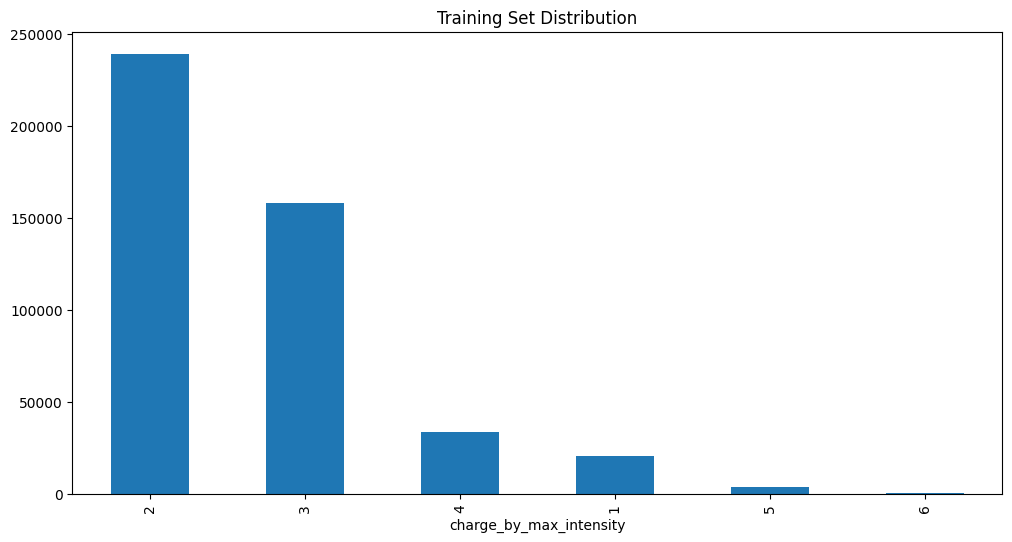

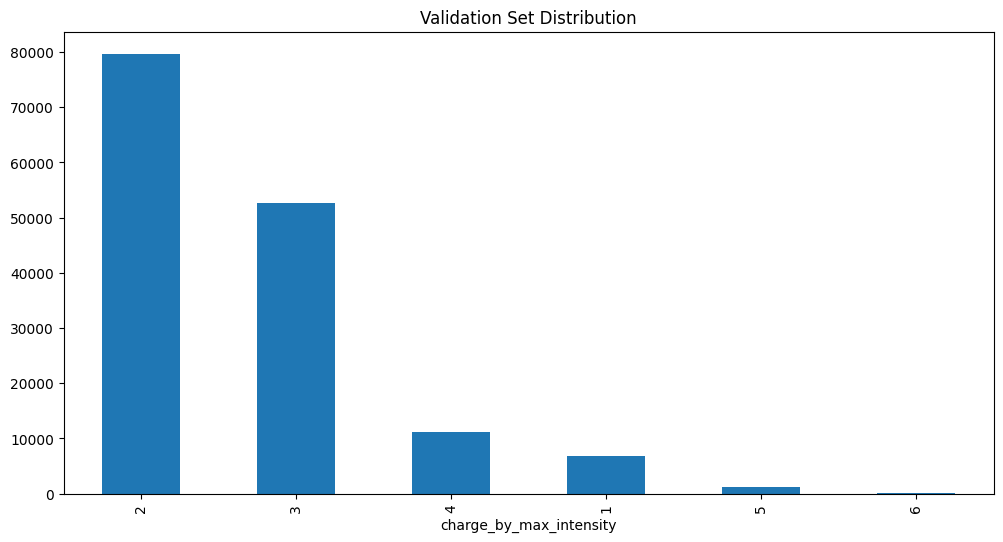

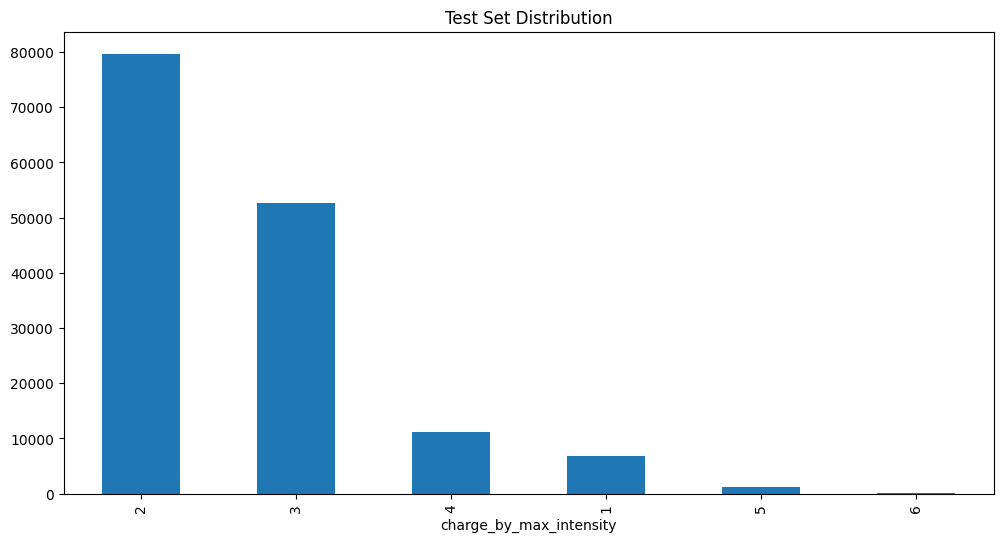

In [90]:
# Plot distribution for training set
plt.figure(figsize=(12, 6))
train_df['charge_by_max_intensity'].value_counts().plot(kind='bar')
plt.title('Training Set Distribution')
plt.show()

# Plot distribution for validation set
plt.figure(figsize=(12, 6))
val_df['charge_by_max_intensity'].value_counts().plot(kind='bar')
plt.title('Validation Set Distribution')
plt.show()

# Plot distribution for test set
plt.figure(figsize=(12, 6))
test_df['charge_by_max_intensity'].value_counts().plot(kind='bar')
plt.title('Test Set Distribution')
plt.show()

## -----------------
# Data split Task 2
## -----------------

In [91]:
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Convert a string representation to actual list
def literal_eval_list(col):
    return [int(x) for x in ast.literal_eval(col)]

# Count unique combinations for charge state vectors
def count_charge_states(df, col):
    # onvert lists or arrays to tuples for counting
    tuples = df[col].apply(lambda x: tuple(x))
    # Count occurrences
    return Counter(tuples)

# Visualize charge state vector distribution
def plot_distribution_with_labels(counter, title):
    labels, counts = zip(*sorted(counter.items()))
    label_strings = [str(label) for label in labels]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(counts)), counts, tick_label=label_strings)
    plt.xlabel("Charge State Vector (binary)")
    plt.ylabel("Count")
    plt.title(title)

    plt.xticks(rotation=90)
    plt.tight_layout() # Prevent label overlap
    plt.show()

    
# Display observed combinations and their counts
def display_combinations_and_counts(counter):
    print("{:<30} {}".format("Charge State Combination", "Count"))
    print("-" * 50)
    for combination, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        combination_str = str(combination)
        print(f"{combination_str:<30} {count}")

train_counter = count_charge_states(train_df, 'charge_state_vector')
val_counter = count_charge_states(val_df, 'charge_state_vector')
test_counter = count_charge_states(test_df, 'charge_state_vector')

print("\nTraining Set Combinations:")
print(f"Number of classes: {len(train_counter)}")
display_combinations_and_counts(train_counter)

print("\nValidation Set Combinations:")
print(f"Number of classes: {len(val_counter)}")
display_combinations_and_counts(val_counter)

print("\nTest Set Combinations:")
print(f"Number of classes: {len(test_counter)}")
display_combinations_and_counts(test_counter)


Training Set Combinations:
Number of classes: 30
Charge State Combination       Count
--------------------------------------------------
(0, 1, 0, 0, 0, 0)             196001
(0, 1, 1, 0, 0, 0)             111357
(0, 0, 1, 0, 0, 0)             56201
(1, 1, 0, 0, 0, 0)             26480
(0, 0, 1, 1, 0, 0)             22347
(1, 0, 0, 0, 0, 0)             16327
(0, 0, 0, 1, 0, 0)             12019
(0, 1, 1, 1, 0, 0)             7546
(0, 0, 0, 1, 1, 0)             2194
(0, 0, 1, 1, 1, 0)             1691
(0, 0, 0, 0, 1, 0)             1228
(1, 1, 1, 0, 0, 0)             248
(0, 1, 1, 1, 1, 0)             237
(0, 1, 0, 1, 0, 0)             204
(0, 0, 0, 0, 1, 1)             167
(0, 0, 0, 1, 1, 1)             148
(0, 0, 0, 0, 0, 1)             114
(0, 0, 1, 1, 1, 1)             74
(0, 0, 1, 0, 1, 0)             62
(0, 0, 0, 1, 0, 1)             15
(0, 1, 0, 1, 1, 0)             10
(0, 1, 1, 1, 1, 1)             5
(0, 0, 1, 0, 1, 1)             4
(0, 0, 1, 1, 0, 1)             3
(1, 0, 1, 0,

In [92]:
# show which classes are missing in the validation set
missing_classes = set(train_counter.keys()) - set(val_counter.keys())
print("Missing classes in validation set:")
for missing_class in missing_classes:
    print(missing_class)
# show which classes are missing in the test set
missing_classes = set(train_counter.keys()) - set(test_counter.keys())
print("Missing classes in test set:")
for missing_class in missing_classes:
    print(missing_class)

Missing classes in validation set:
(0, 1, 1, 1, 0, 1)
(0, 0, 1, 0, 0, 1)
(0, 1, 0, 0, 1, 0)
Missing classes in test set:
(0, 1, 1, 1, 0, 1)
(1, 1, 1, 1, 0, 0)
(0, 1, 0, 0, 1, 0)


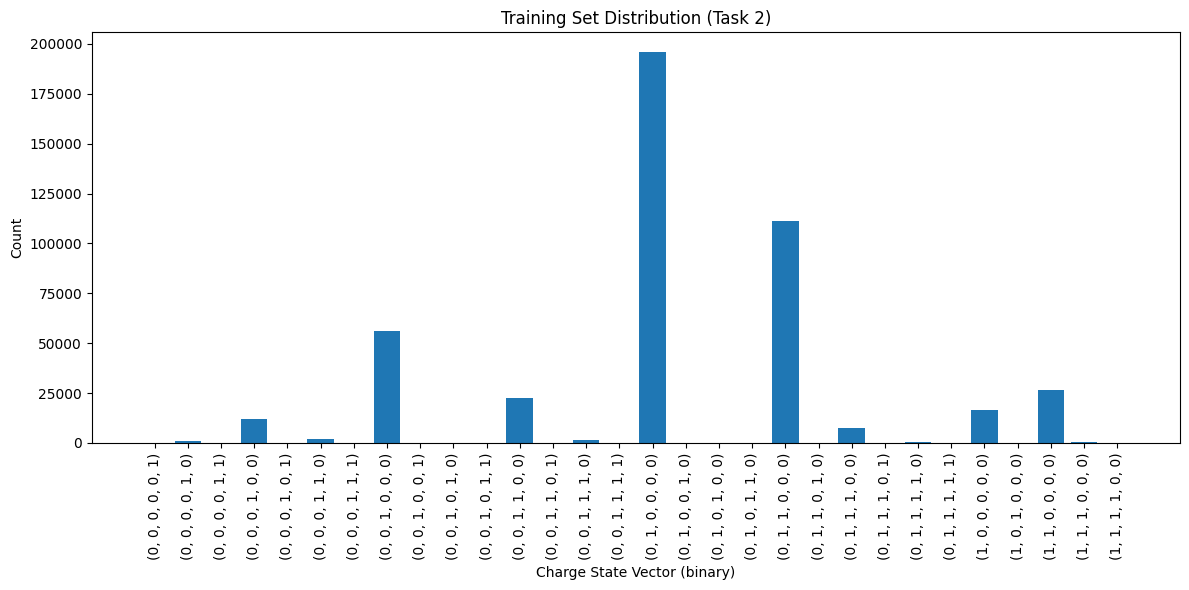

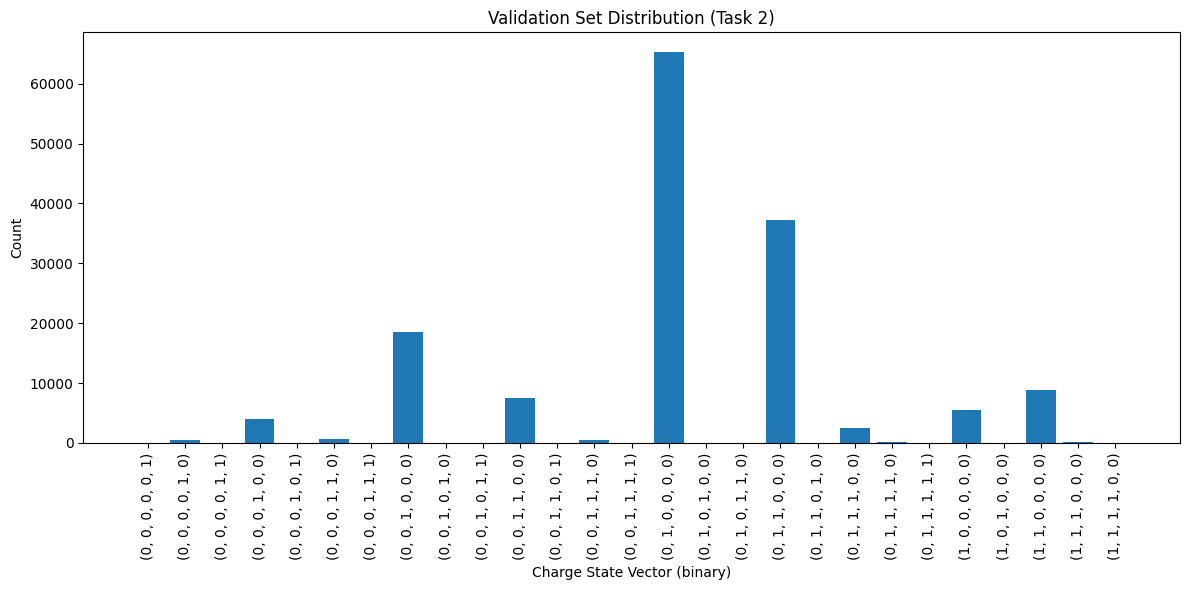

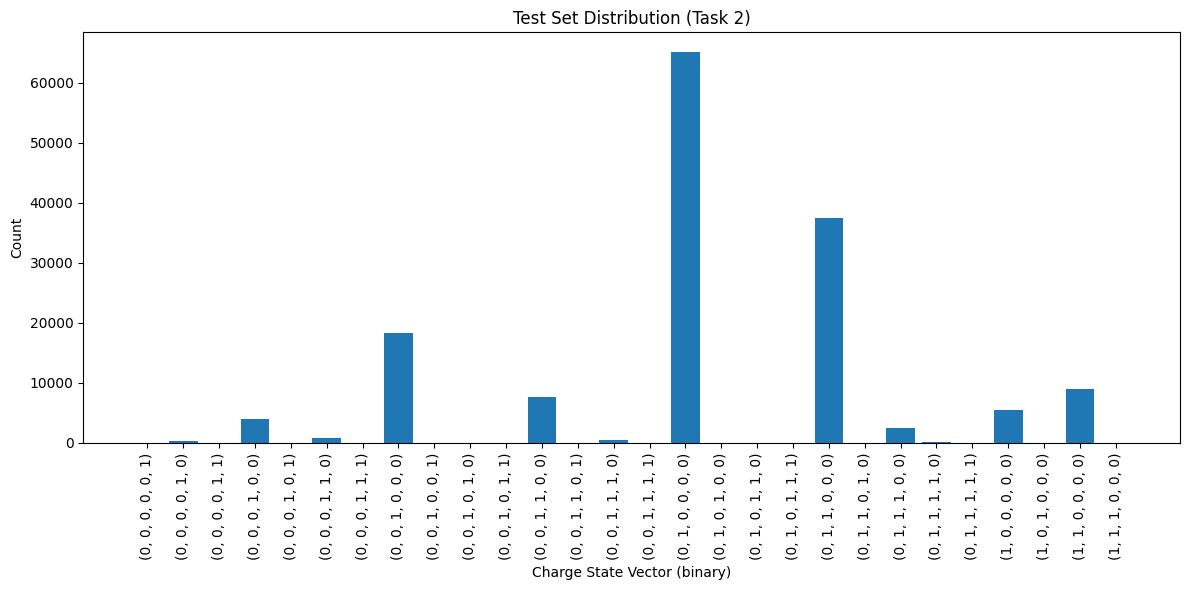

In [93]:
train_counter = count_charge_states(train_df, 'charge_state_vector')
val_counter = count_charge_states(val_df, 'charge_state_vector')
test_counter = count_charge_states(test_df, 'charge_state_vector')

plot_distribution_with_labels(train_counter, "Training Set Distribution (Task 2)")
plot_distribution_with_labels(val_counter, "Validation Set Distribution (Task 2)")
plot_distribution_with_labels(test_counter, "Test Set Distribution (Task 2)")

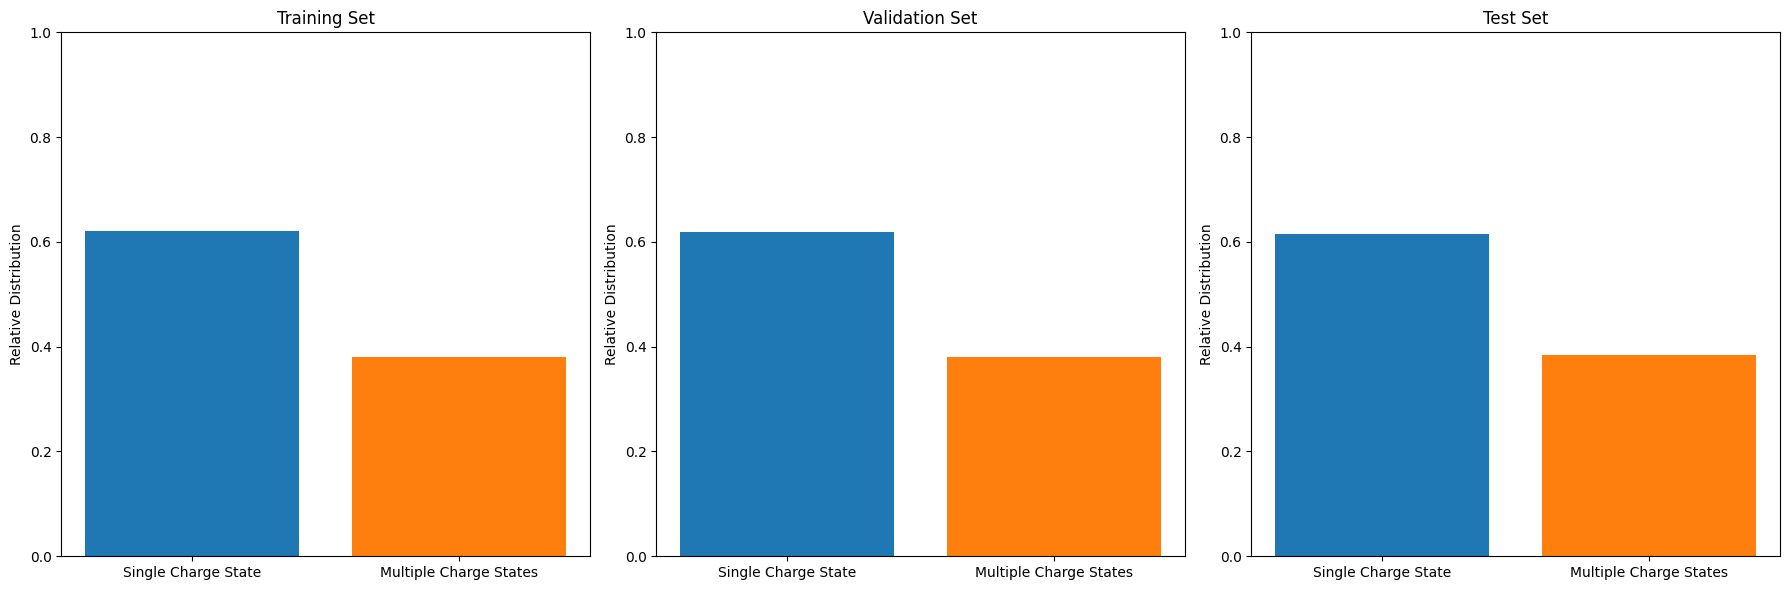

Training Set - Single: 281890 (62.00%), Multiple: 172802 (38.00%)
Validation Set - Single: 93813 (61.90%), Multiple: 57751 (38.10%)
Test Set - Single: 93360 (61.60%), Multiple: 58204 (38.40%)


In [113]:
# Check if the vector contains only one charge state
def is_single_charge_state(vector):
    return sum(vector) == 1

# Check for single and multiple charge states
def count_and_relative_distribution(df, col):
    single_charge_state = df[col].apply(is_single_charge_state)
    single_count = single_charge_state.sum()
    multiple_count = len(single_charge_state) - single_count
    
    total_count = len(single_charge_state)
    single_relative = single_count / total_count
    multiple_relative = multiple_count / total_count
    
    return single_count, multiple_count, single_relative, multiple_relative

# Check distribution of charge state vectors in the sets
train_single, train_multiple, train_single_rel, train_multiple_rel = count_and_relative_distribution(train_df, 'charge_state_vector')
val_single, val_multiple, val_single_rel, val_multiple_rel = count_and_relative_distribution(val_df, 'charge_state_vector')
test_single, test_multiple, test_single_rel, test_multiple_rel = count_and_relative_distribution(test_df, 'charge_state_vector')

def plot_relative_distributions(single_rel, multiple_rel, title, ax):
    labels = ['Single Charge State', 'Multiple Charge States']
    relative_counts = [single_rel, multiple_rel]
    ax.bar(labels, relative_counts, color=['C0', 'C1'])
    ax.set_ylabel("Relative Distribution")
    ax.set_title(title)
    ax.set_ylim(0, 1)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_relative_distributions(train_single_rel, train_multiple_rel, "Training Set", axs[0])
plot_relative_distributions(val_single_rel, val_multiple_rel, "Validation Set", axs[1])
plot_relative_distributions(test_single_rel, test_multiple_rel, "Test Set", axs[2])

plt.tight_layout()
plt.show()

print(f"Training Set - Single: {train_single} ({train_single_rel:.2%}), Multiple: {train_multiple} ({train_multiple_rel:.2%})")
print(f"Validation Set - Single: {val_single} ({val_single_rel:.2%}), Multiple: {val_multiple} ({val_multiple_rel:.2%})")
print(f"Test Set - Single: {test_single} ({test_single_rel:.2%}), Multiple: {test_multiple} ({test_multiple_rel:.2%})")

## -----------------
# Data split Task 3
## -----------------

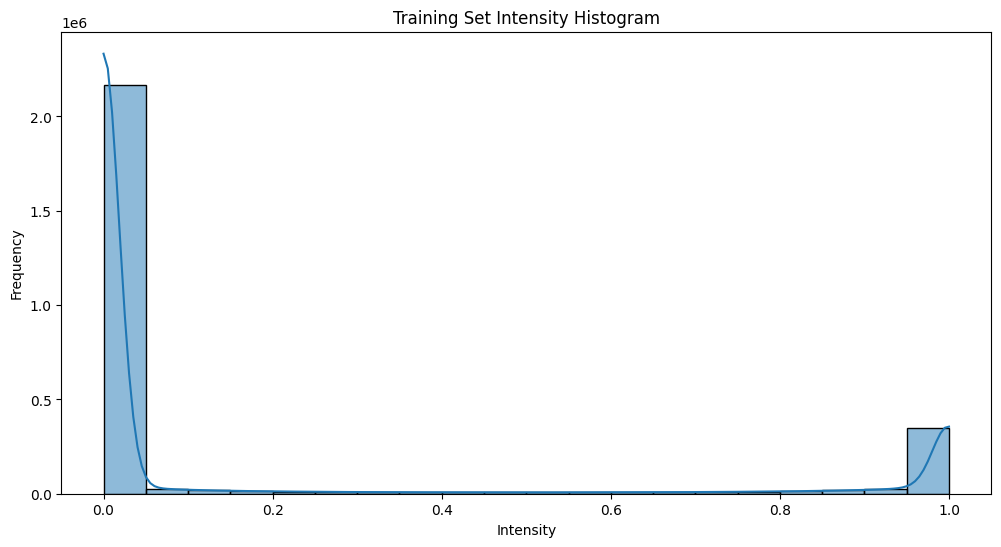

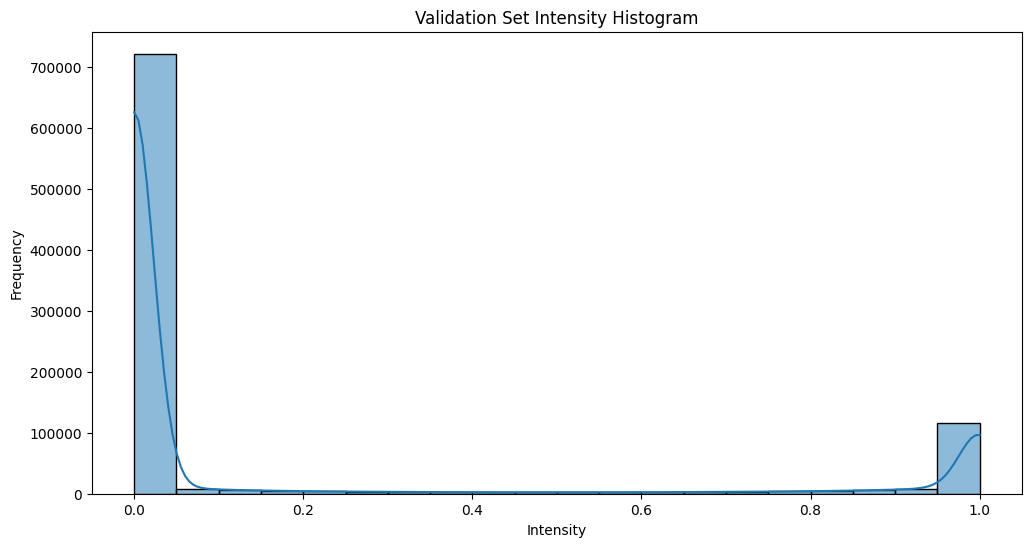

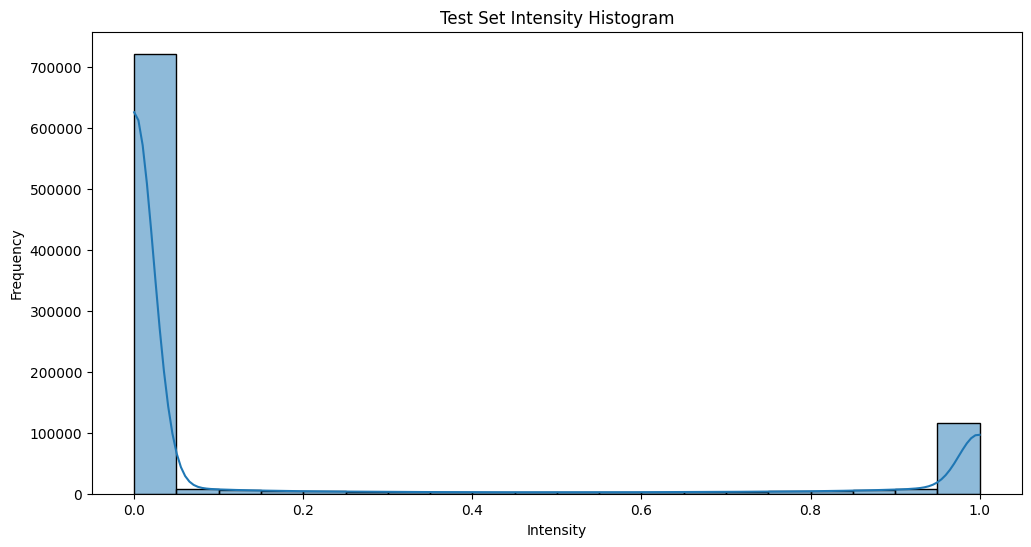

In [51]:
def array_to_list(val):
    if isinstance(val, (list, np.ndarray)):
        return list(val)
    return None

def plot_intensity_histogram(df, title):
    # Convert NumPy arrays to lists and parse
    df['parsed_intensity'] = df['normalized_intensity_distribution'].apply(array_to_list)
    parsed_values = df['parsed_intensity'].dropna().explode()
    plt.figure(figsize=(12, 6))
    sns.histplot(parsed_values, kde=True, bins=20)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_intensity_histogram(train_df, "Training Set Intensity Histogram")
plot_intensity_histogram(val_df, "Validation Set Intensity Histogram")
plot_intensity_histogram(test_df, "Test Set Intensity Histogram")

## -----------------
# Exploratory plots
## -----------------

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [62]:
processed_data.tail()

,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution
758521,YYYVGFAYL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5439354.0, 832455.9, 3048967.0, 1694847.0, 36...",1,5439354.0,1,2.476871e+06,"[1, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0]","[0.9838318904718528, 0.01616810952814731, 0.0,..."
758522,YYYVPADFVEYEK,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[260337200.0, 501610000.0, 260337200.0, 501610...",2,501610000.0,2,1.137543e+08,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
758523,YYYVQNVYTPVDEHVYPDHR,"[3, 4, 3, 4, 3, 3, 3, 3, 3, 3]","[11725650.0, 14743500.0, 11725650.0, 14743500....",4,14743500.0,4,1.474350e+07,"[0, 0, 0, 1, 0, 0]","[0, 0, 1, 1, 0, 0]","[0.0, 0.0, 0.7274547182194011, 0.2725452817805..."
758524,YYYWVINPADSSGITPK,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[36403250.0, 77270170.0, 11621660.0, 679866900...",2,679866900.0,2,1.298827e+08,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
758525,YYYYIREA,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[5875466.0, 6046599.0, 1332756.0, 26062970.0, ...",2,75340040.0,2,2.920490e+07,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"


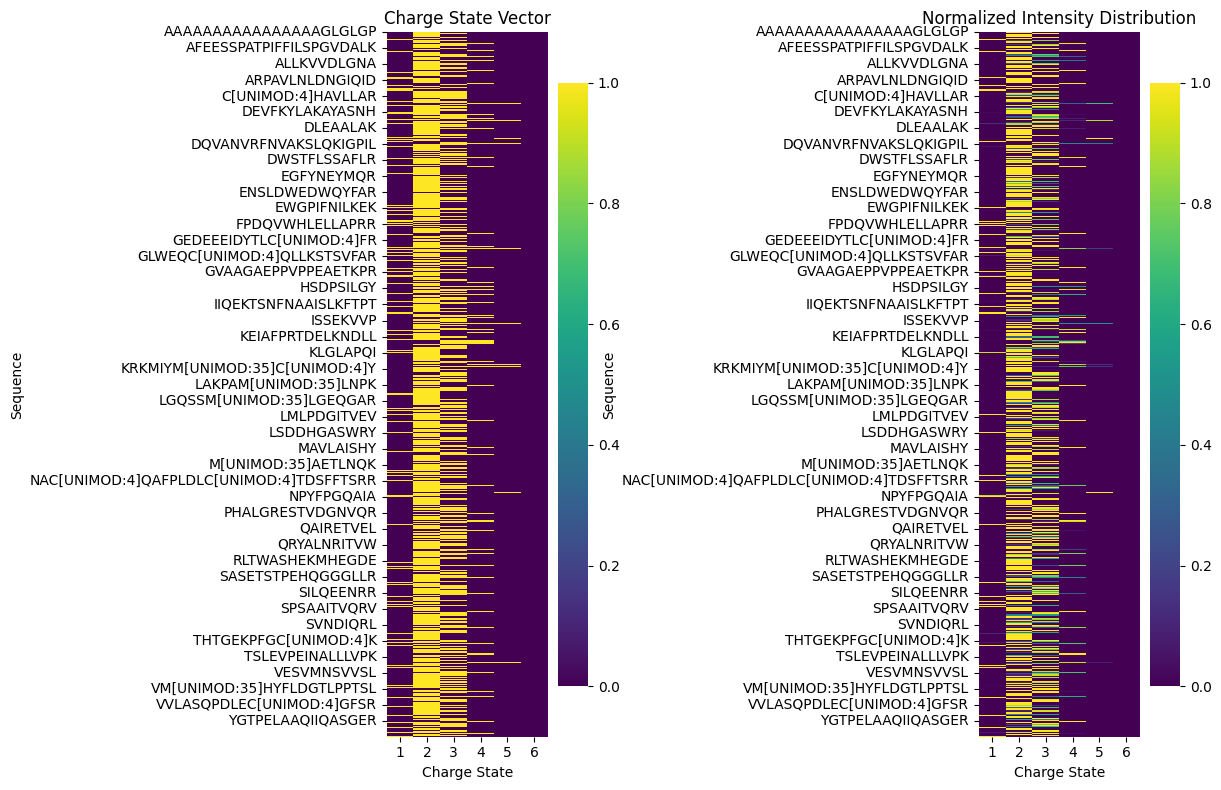

In [61]:
plot_df = processed_data.copy()

charge_state_df = pd.DataFrame(plot_df['charge_state_vector'].tolist(), index=plot_df['modified_sequence'], columns=[f'{i}' for i in range(1, 7)])
intensity_dist_df = pd.DataFrame(plot_df['normalized_intensity_distribution'].tolist(), index=plot_df['modified_sequence'], columns=[f'{i}' for i in range(1, 7)])

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(charge_state_df, cmap='viridis', cbar=True)
plt.title('Charge State Vector')
plt.xlabel('Charge State')
plt.ylabel('Sequence')

plt.subplot(1, 2, 2)
sns.heatmap(intensity_dist_df, cmap='viridis', cbar=True)
plt.title('Normalized Intensity Distribution')
plt.xlabel('Charge State')
plt.ylabel('Sequence')

plt.tight_layout()
plt.show()

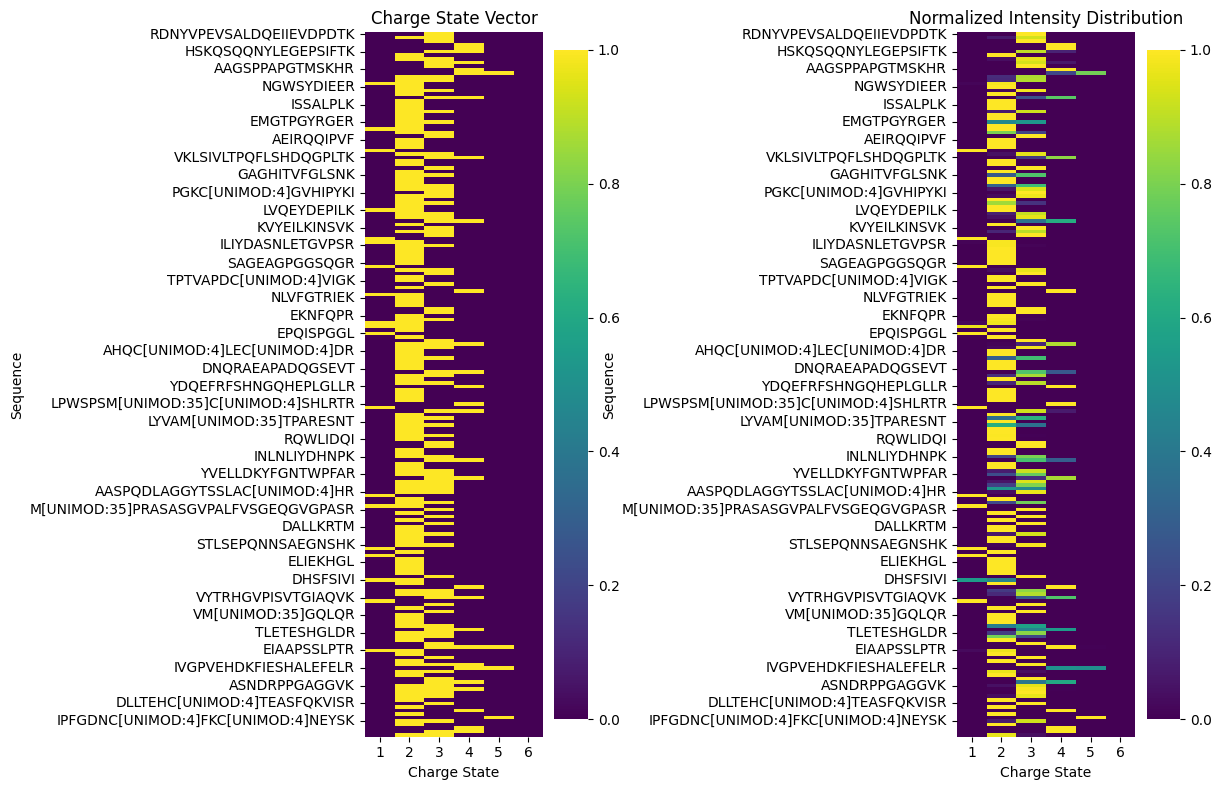

In [76]:
#Sampling some of the data
sampled_df = plot_df.sample(n=200, random_state=42)  

charge_state_sampled_df = pd.DataFrame(sampled_df['charge_state_vector'].tolist(), index=sampled_df['modified_sequence'], columns=[f'{i}' for i in range(1, 7)])
intensity_dist_sampled_df = pd.DataFrame(sampled_df['normalized_intensity_distribution'].tolist(), index=sampled_df['modified_sequence'], columns=[f'{i}' for i in range(1, 7)])


plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(charge_state_sampled_df, cmap='viridis', cbar=True)
plt.title('Charge State Vector')
plt.xlabel('Charge State')
plt.ylabel('Sequence')

plt.subplot(1, 2, 2)
sns.heatmap(intensity_dist_sampled_df, cmap='viridis', cbar=True)
plt.title('Normalized Intensity Distribution')
plt.xlabel('Charge State')
plt.ylabel('Sequence')

plt.tight_layout()
plt.show()

#### Idea: group by unique charge state vector
#### --> mean over each group

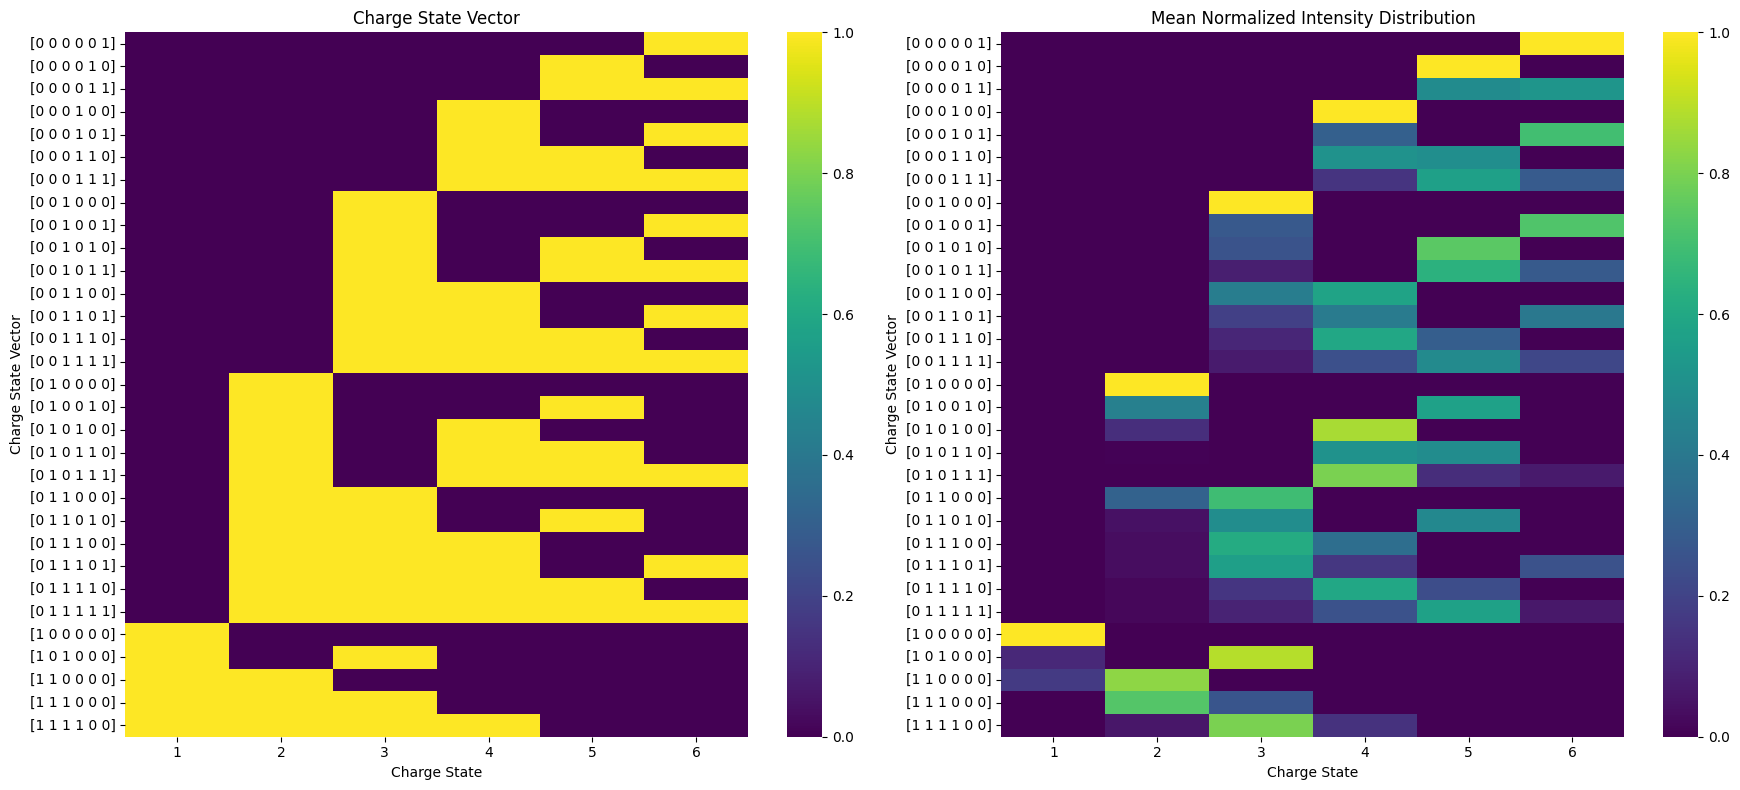

In [124]:
plot_df = processed_data.copy()
plot_df['charge_state_vector_str'] = plot_df['charge_state_vector'].apply(lambda x: str(x))

# Group by charge state vector string
grouped = plot_df.groupby('charge_state_vector_str')
# Calculate mean of normalized intensity distribution
agg_intensity_dist_df = grouped['normalized_intensity_distribution'].apply(lambda x: np.mean(np.vstack(x), axis=0)).reset_index(drop=True)

unique_charge_state_vectors = grouped['charge_state_vector'].first().apply(pd.Series).reset_index(drop=True)
unique_charge_state_vectors.columns = [i for i in range(1, 7)]
agg_intensity_dist_df = pd.DataFrame(agg_intensity_dist_df.tolist(), columns=[i for i in range(1, 7)])

# Charge state vectors as labels
ytick_labels = [str(vec) for vec in grouped['charge_state_vector'].first().index]

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(unique_charge_state_vectors, cmap='viridis', cbar=True, yticklabels=ytick_labels)
plt.title('Charge State Vector')
plt.xlabel('Charge State')
plt.ylabel('Charge State Vector')

plt.subplot(1, 2, 2)
sns.heatmap(agg_intensity_dist_df, cmap='viridis', cbar=True, yticklabels=ytick_labels)
plt.title('Mean Normalized Intensity Distribution')
plt.xlabel('Charge State')
plt.ylabel('Charge State Vector')

plt.tight_layout()
plt.show()

